# Convolutional Neural Networks in 15 minutes or more

This is the neural network model (VGG) that we will be using!

<img src="tutorial_img/conv/vgg.png" width="423">

Convolutional Neural Networks (ConvNets or CNNs) are a category of Neural Networks that have proven very effective in areas such as image recognition and classification. ConvNets have been successful in identifying faces, objects and traffic signs apart from powering vision in robots and self driving cars.

<img src="tutorial_img/conv/example_image_1.jpg" width="800">

ConvNet is able to recognize scenes and the system is able to suggest relevant captions (“a street sign on a pole in front of a building”) while the images below shows an example of ConvNets being used for recognizing everyday objects, humans and animals. Lately, ConvNets have been effective in several Natural Language Processing tasks (such as sentence classification) as well.

<img src="tutorial_img/conv/example_image_2.png" width="800">

## Convolutional Layers

### An Image is a matrix of pixel values
Essentially, every image can be represented as a matrix of pixel values.

<img src="tutorial_img/conv/8.gif" width="200">

**Channel** is a conventional term used to refer to a certain component of an image. An image from a standard digital camera will have three channels – red, green and blue – you can imagine those as three 2d-matrices stacked over each other (one for each color), each having pixel values in the range 0 to 255. A grayscale image, on the other hand, has just one channel. 

### The Convolution Step

ConvNets derive their name from the “convolution” operator. The primary purpose of Convolution in case of a ConvNet is to extract features from the input image. Convolution preserves the spatial relationship between pixels by learning image features using small squares of input data. Consider a 5 x 5 image whose pixel values are only 0 and 1:

<img src="tutorial_img/conv/matrix.png" width="160">


Also, consider another 3 x 3 matrix as shown below:


<img src="tutorial_img/conv/filter.png" width="100">


Then, the Convolution of the 5 x 5 image and the 3 x 3 matrix can be computed as shown in the animation below:

<img src="tutorial_img/conv/convolution_schematic.gif" width="250">

Take a moment to understand how the computation above is being done. We slide the orange matrix over our original image (green) by 1 pixel (also called **stride**) and for every position, we compute element wise multiplication (between the two matrices) and add the multiplication outputs to get the final integer which forms a single element of the output matrix (pink). Note that the 3×3 matrix “sees” only a part of the input image in each stride.

In CNN terminology, the 3×3 matrix is called a ‘filter‘ or ‘kernel’ or ‘feature detector’ and the matrix formed by sliding the filter over the image and computing the dot product is called the ‘Convolved Feature’ or ‘Activation Map’ or the ‘Feature Map‘. It is important to note that filters acts as feature detectors from the original input image. It is evident from the animation above that different values of the filter matrix will produce different Feature Maps for the same input image. 

### Why do we need all of this?

<img src="tutorial_img/conv/cnn.jpg" width="423">

As we will see, the neurons in a layer will only be connected to a small region of the layer before it, instead of all of the neurons in a fully-connected manner. 

<img src="tutorial_img/conv/Conv1.png" width="700">

Turns out regular Neural Nets don’t scale well to full images. Even images that are only of size 32x32x3 (32 wide, 32 high, 3 color channels), a single fully-connected neuron in a first hidden layer of a regular Neural Network would have $32*32*3 = 3072$ weights. 

This amount still seems manageable, but clearly this fully-connected structure does not scale to larger images. For example, an image of more respectable size, e.g. $200 * 200 * 3$, would lead to neurons that have $200*200*3 = 120,000$ weights. Moreover, we would almost certainly want to have several such neurons, so the parameters would add up quickly! Clearly, this full connectivity is wasteful.

### Filters 

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

We'll be using Lena, an image commonly used in image processing to visualize our results

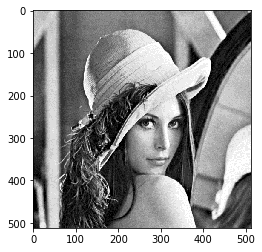

In [2]:
lena = Image.open('tutorial_img/lena.png').convert('L')
plt.imshow(lena)

Remember that this image is essentially just a $500 \times 500$ matrix of values.

In [3]:
np.asarray(lena).shape

(512, 512)

We'll be learning about filters and how they work, with a particular focus on $3\times 3$ filters. Filters are commonly used to smoothing, sharpening, and edge detection. Take a look at this first filter - a verticle edge detector.
$$\begin{bmatrix}-1&0&1\\-2&0&2\\-1&0&1\end{bmatrix}$$

In [4]:
def convolution(image, _filter):
    '''Your implementation here'''
    m, n = image.shape
    fm, fn = _filter.shape
    conv_img = np.zeros((m,n))
    
    ########################################################
    # TODO: Implement the convolutional filter using numpy #
    ########################################################
    
    
    vals = []
    final = np.zeros((fm,fn))
    for i in range(fm//2,m-fm//2):
        for j in range(fn//2,n-fn//2):
            vals = image[i-fm//2:i+fm//2+1,j-fn//2:j+fn//2+1]
        
            value = np.sum(vals*_filter)
            conv_img[i][j] = value

    ########################################################
    #             End of your code                         #
    ########################################################
    
    return conv_img

In [5]:
np.zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

Text(0.5,1,'Smooth Filter')

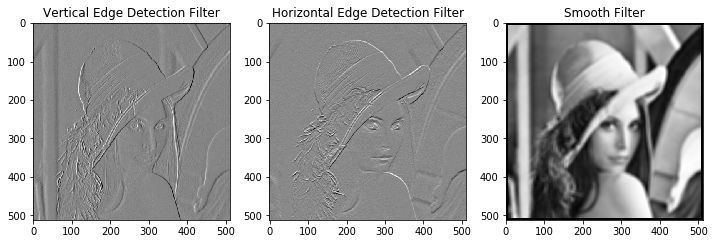

In [6]:
vertical = np.array([[-1,0,1], [-2,0,2],[-1,0,1]]) # Vertical edge detection
horizontal = np.array([[-1,-2,-1],[0,0,0],[1,2,1]]) # Horizontal edge detection
smooth = np.ones((11,11))/100
lena_img = np.array(lena)
vertical_img = convolution(lena_img, vertical)
horizontal_img = convolution(lena_img, horizontal)
smooth_img = convolution(lena_img, smooth)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,8))
ax1.imshow(vertical_img, cmap='gray')
ax1.set_title('Vertical Edge Detection Filter')
ax2.imshow(horizontal_img, cmap='gray')
ax2.set_title('Horizontal Edge Detection Filter')
ax3.imshow(smooth_img, cmap='gray')
ax3.set_title('Smooth Filter')### The Pooling Step

Another good way to understand the Convolution operation is by looking at this animation.

<img src="tutorial_img/conv/giphy.gif" width="550">

In practice, a CNN learns the values of these filters on its own during the training process (although we still need to specify parameters such as number of filters, filter size, architecture of the network etc. before the training process). The more number of filters we have, the more image features get extracted and the better our network becomes at recognizing patterns in unseen images.

The size of the Feature Map (Convolved Feature) is controlled by three parameters that we need to decide before the convolution step is performed:

* **Depth**: Depth corresponds to the number of filters we use for the convolution operation. In the network shown in Figure 7, we are performing convolution of the original boat image using three distinct filters, thus producing three different feature maps as shown. You can think of these three feature maps as stacked 2d matrices, so, the ‘depth’ of the feature map would be three.

<img src="tutorial_img/conv/depth.png" width="450">

* **Stride**: Stride is the number of pixels by which we slide our filter matrix over the input matrix. When the stride is 1 then we move the filters one pixel at a time. When the stride is 2, then the filters jump 2 pixels at a time as we slide them around. Having a larger stride will produce smaller feature maps.
* **Zero-padding**: Sometimes, it is convenient to pad the input matrix with zeros around the border, so that we can apply the filter to bordering elements of our input image matrix. Without zero-padding, every time we pass through a convolutional layer, we will be losing pixels! (With a 5x5 filter applied to a 32x32 image, we would get 28x28)

## Introducing Non-linearities

An additional operation called ReLU has been used after every Convolution operation. ReLU stands for Rectified Linear Unit and is a non-linear operation. Its output is given by:

<img src="tutorial_img/conv/relu.png">

ReLU is an element wise operation (applied per pixel) and replaces all negative pixel values in the feature map by zero. The purpose of ReLU is to introduce non-linearity in our ConvNet, since most of the real-world data we would want our ConvNet to learn would be non-linear (Convolution is a linear operation – element wise matrix multiplication and addition, so we account for non-linearity by introducing a non-linear function like ReLU).

<img src="tutorial_img/conv/relu_image.png">


Now let's implement a forward pass for a convolutional layer!

In [7]:
def conv_forward_naive(x, w, b, stride, pad):
    """
    A naive implementation of the forward pass for a convolutional layer.

    The input consists of N data points, each with C channels, height H and width
    W. We convolve each input with F different filters, where each filter spans
    all C channels and has height HH and width HH.

    Input:
    - x: Input data of shape (N, C, H, W)
    - w: Filter weights of shape (F, C, HH, WW)
    - b: Biases, of shape (F,)
    - stride: The number of pixels between adjacent receptive fields in the
      horizontal and vertical directions.
    - pad: The number of pixels that will be used to zero-pad the input.

    Returns:
    - out: Output data, of shape (N, F, H', W') where H' and W' are given by
    H' = 1 + (H + 2 * pad - HH) / stride
    W' = 1 + (W + 2 * pad - WW) / stride
    """
    #############################################################################
    # TODO: Implement the convolutional forward pass.                           #
    #############################################################################
    (N, C, H, W), (F, C, HH, WW) = x.shape, w.shape
    x_padded = np.pad(x, [(0,0), (0,0), (pad,pad), (pad,pad)], 'constant')
    
    # Think about why H_out, W_out is the following
    H_out = 1 + (H + 2 * pad - HH) // stride
    W_out = 1 + (W + 2 * pad - WW) // stride
    out = np.zeros((N, F, H_out, W_out))
    
    for i in C:
        convolution(image, _filter)
 
    return out

Now let's test if it works!

In [8]:
img1 = lena_img.reshape(1,1,512,512)
img2 = Image.open('tutorial_img/conv/download.jpg').convert('L')
img2 = np.array(img2).reshape(1,1,512,512)
img2.shape
images = np.vstack([img1, img2])

In [9]:
smooth = (np.ones((3,3))/9).reshape(1,1,3,3)
filters = np.vstack([vertical.reshape(1,1,3,3), horizontal.reshape(1,1,3,3), smooth])

out_img = conv_forward_naive(images, filters, np.zeros(3), 2, 1)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,8))
ax1.imshow(out_img[1][0], cmap='gray')
ax1.set_title('Vertical Edge Detection Filter')
ax2.imshow(out_img[1][1], cmap='gray')
ax2.set_title('Horizontal Edge Detection Filter')
ax3.imshow(out_img[1][2], cmap='gray')
ax3.set_title('Smooth Filter')### The Pooling Step

TypeError: 'int' object is not iterable

## Max-Pooling
$\textbf{Spatial Pooling}$ (also called subsampling or downsampling) reduces the dimensionality of each feature map but retains the most important information. Spatial Pooling can be of different types: Max, Average, Sum etc.

In case of Max Pooling, we define a spatial neighborhood (for example, a 2×2 window) and take the largest element from the rectified feature map within that window. Instead of taking the largest element we could also take the average (Average Pooling) or sum of all elements in that window. In practice, Max Pooling has been shown to work better.

<img src="tutorial_img/conv/max_pooling.png" width="423">

We slide our 2 x 2 window by 2 cells (also called ‘stride’) and take the maximum value in each region. As shown in the figure above, this reduces the dimensionality of our feature map.

In the network shown in below, pooling operation is applied separately to each feature map (notice that, due to this, we get three output maps from three input maps).

<img src="tutorial_img/conv/pooling.png" width="423">

The function of Pooling is to progressively reduce the spatial size of the input representation. In particular, pooling

* makes the input representations (feature dimension) smaller and more manageable
* reduces the number of parameters and computations in the network, therefore, controlling overfitting
* makes the network invariant to small transformations, distortions and translations in the input image (a small distortion in input will not change the output of Pooling – since we take the maximum / average value in a local neighborhood).
* helps us arrive at an almost scale invariant representation of our image (the exact term is “equivariant”). This is very powerful since we can detect objects in an image no matter where they are located.


In [ ]:
def max_pool_forward_naive(x, pool_height, pool_width, stride):
    """
    A naive implementation of the forward pass for a max pooling layer.

    Inputs:
    - x: Input data, of shape (N, C, H, W)
    - pool_height: The height of each pooling region
    - pool_width: The width of each pooling region
    - stride: The distance between adjacent pooling regions

    Returns:
    - out: Output data
    """
    #############################################################################
    # TODO: Implement the max pooling forward pass                              #
    #############################################################################
    (N, C, H, W) = x.shape
    # Think about why H_pool, W_pool is the following
    H_pool = 1 + (H - pool_height) / stride
    W_pool = 1 + (W - pool_width) / stride
    out = np.zeros((N, C, H_pool, W_pool))
    
    # Your code here
    
    
    
    
    
    
    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################
    return out


### What we have so far (You've just built a CNN!)

<img src="tutorial_img/conv/cnn.png" width="800">

So far we have seen how Convolution, ReLU and Pooling work. It is important to understand that these layers are the basic building blocks of any CNN. As shown in Figure 13, we have two sets of Convolution, ReLU & Pooling layers – the 2nd Convolution layer performs convolution on the output of the first Pooling Layer using six filters to produce a total of six feature maps. ReLU is then applied individually on all of these six feature maps. We then perform Max Pooling operation separately on each of the six rectified feature maps. Together these layers extract the useful features from the images, introduce non-linearity in our network and reduce feature dimension while aiming to make the features somewhat equivariant to scale and translation.



## Recap

The overall training process of the Convolution Network may be summarized as below:

* **Step 1**: We initialize all filters and parameters / weights with random values



* **Step 2**: The network takes a training image as input, goes through the forward propagation step (convolution, ReLU and pooling operations along with forward propagation in the Fully Connected layer) and finds the output probabilities for each class



* **Step 3**: Calculate the total error at the output layer (summation over all 4 classes)



* **Step 4**: Use Backpropagation to calculate the gradients of the error with respect to all weights in the network and use gradient descent to update all filter values / weights and parameter values to minimize the output error.



* **Step 5**: Repeat steps 2-4 with all images in the training set.

The above steps train the ConvNet – this essentially means that all the weights and parameters of the ConvNet have now been optimized to correctly classify images from the training set.

When a new (unseen) image is input into the ConvNet, the network would go through the forward propagation step and output a probability for each class (for a new image, the output probabilities are calculated using the weights which have been optimized to correctly classify all the previous training examples). If our training set is large enough, the network will (hopefully) generalize well to new images and classify them into correct categories.



## ConvNet with PyTorch

Very conviniently, if we use PyTorch, we won't have to implement those convolutional layers from scratch :) PyTorch provides modules that can easily create a convolutional layer of your choice. We will be using a simple dataset called MNIST. MNIST is a database containing images of handwritten digits, with each image labeled by integer. It;s used to benchmark the performance of machine learning algorithms. Deep learning performs quite well on MNIST, achieving more than 99.7% accuracy.

<img src="tutorial_img/conv/mnist.png" width="500">

We will use MNIST to train a neural network to look at each image and predict the digit.

In [12]:
import torch 
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable


# Hyper Parameters
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST Dataset
train_dataset = dsets.MNIST(root='./data/',
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data/',
                           train=False, 
                           transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)


Processing...
Done!


Let's now build a CNN class with PyTorch!

In [21]:
# CNN Model (2 conv layer)
#####################################################################
# CNN with two convolutional layers (Conv2d->ReLU->MaxPool2d)       #
# followed by a fully connected layer (Linear)                      #
#####################################################################
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Define layer1/layer2 to be a conv layer such that Conv2d->ReLU->MaxPool2d
        # Any input parameter such as kernel_size is up to you
        # Look up nn.Sequential and nn.Conv2d
        #padding is 2 in this case because the kernel size is 5x5 and your output
        #would be w-5+1 by h-5+1 or w-4 by h-4 so padding = 2 
        self.layer1 = nn.Sequential(
                    nn.Conv2d(1,16,5,padding=2), 
                    nn.ReLU(),
                    nn.MaxPool2d(2)
        )
        
        self.layer2 =nn.Sequential(
                    nn.Conv2d(16,10,5,padding=2),
                    nn.ReLU(),
                    nn.MaxPool2d(2)
        )
         
        
        
        # Define self.fc to be a fully connected layer
        # Look at nn.Linear and let's have out_features = 10 -> num of classes 0-9
        self.fc = nn.Linear(490,10)
        
    def forward(self, x):
        # Now implement the forward pass
        # We provided you the first step
        
        y1 = self.layer1(x)
        y2 = self.layer2(y1)
        out = self.fc(y2.view(y2.size(0), -1))
        
        # For the self.fc pass
        # Using view(out.size(0), -1) might be helpful
        
        
        return out
################################################
# Take the time the understand the code above  #
################################################

Time to train our model!

In [22]:
cnn = CNN()

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=learning_rate)

# Train the Model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images)
        labels = Variable(labels)
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = cnn(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [%d/%d], Iter [%d/%d] Loss: %.4f' 
                   %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))

# Test the Model
cnn.eval()  # Change model to 'eval' mode
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images)
    outputs = cnn(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Test Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total))

Epoch [1/5], Iter [100/600] Loss: 0.5365
Epoch [1/5], Iter [200/600] Loss: 0.2885
Epoch [1/5], Iter [300/600] Loss: 0.1824
Epoch [1/5], Iter [400/600] Loss: 0.1741
Epoch [1/5], Iter [500/600] Loss: 0.1405
Epoch [1/5], Iter [600/600] Loss: 0.1569
Epoch [2/5], Iter [100/600] Loss: 0.1444
Epoch [2/5], Iter [200/600] Loss: 0.0935
Epoch [2/5], Iter [300/600] Loss: 0.1656
Epoch [2/5], Iter [400/600] Loss: 0.0191
Epoch [2/5], Iter [500/600] Loss: 0.0848
Epoch [2/5], Iter [600/600] Loss: 0.1093
Epoch [3/5], Iter [100/600] Loss: 0.0363
Epoch [3/5], Iter [200/600] Loss: 0.0696
Epoch [3/5], Iter [300/600] Loss: 0.1230
Epoch [3/5], Iter [400/600] Loss: 0.1061
Epoch [3/5], Iter [500/600] Loss: 0.0590
Epoch [3/5], Iter [600/600] Loss: 0.0498
Epoch [4/5], Iter [100/600] Loss: 0.0430
Epoch [4/5], Iter [200/600] Loss: 0.0485
Epoch [4/5], Iter [300/600] Loss: 0.0423
Epoch [4/5], Iter [400/600] Loss: 0.1097
Epoch [4/5], Iter [500/600] Loss: 0.1001
Epoch [4/5], Iter [600/600] Loss: 0.0286
Epoch [5/5], Ite

## Visualizing Convolutional Neural Networks



<img src="tutorial_img/conv/conv_vis.jpg" width="1000">


CNN filters can be visualized when we optimize the input image with respect to output of the specific convolution operation. If we take a look at VGG16, the visualizations of layers start with basic color and direction filters at lower levels. As we approach towards the final layer the complexity of the filters also increase. 

<img src="tutorial_img/conv/layer.png" width="700">
<img src="tutorial_img/conv/layer2.png" width="700">
